video link -https://drive.google.com/drive/folders/1u17ALDql6DKzUerdYUmgPKWOzL4N1Md8?dmr=1&ec=wgc-drive-hero-goto

Source-chat gpt for plotting heat map ,graphs and some logics and geek for geeks


reffered links-https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html


In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score



In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/bank.csv')
print(df.head())


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [ ]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [ ]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [ ]:
print(df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


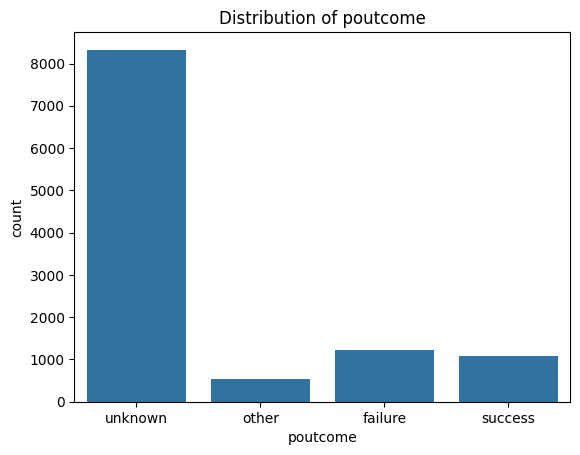

poutcome
unknown    0.745924
failure    0.110016
success    0.095951
other      0.048110
Name: proportion, dtype: float64


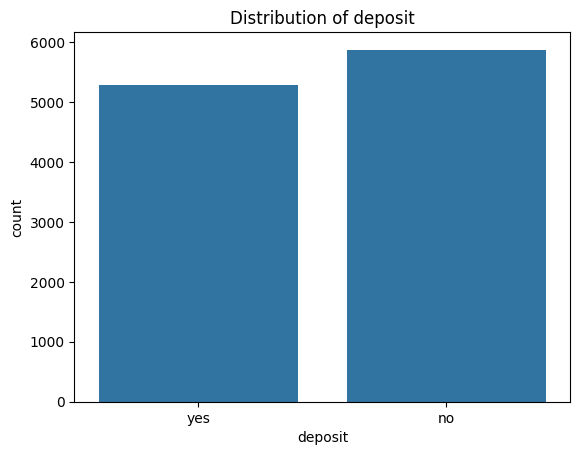

deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64


In [ ]:

sns.countplot(x='poutcome', data=df)
plt.title('Distribution of poutcome')
plt.show()

print(df['poutcome'].value_counts(normalize=True))

sns.countplot(x='deposit', data=df)
plt.title('Distribution of deposit')
plt.show()

print(df['deposit'].value_counts(normalize=True))

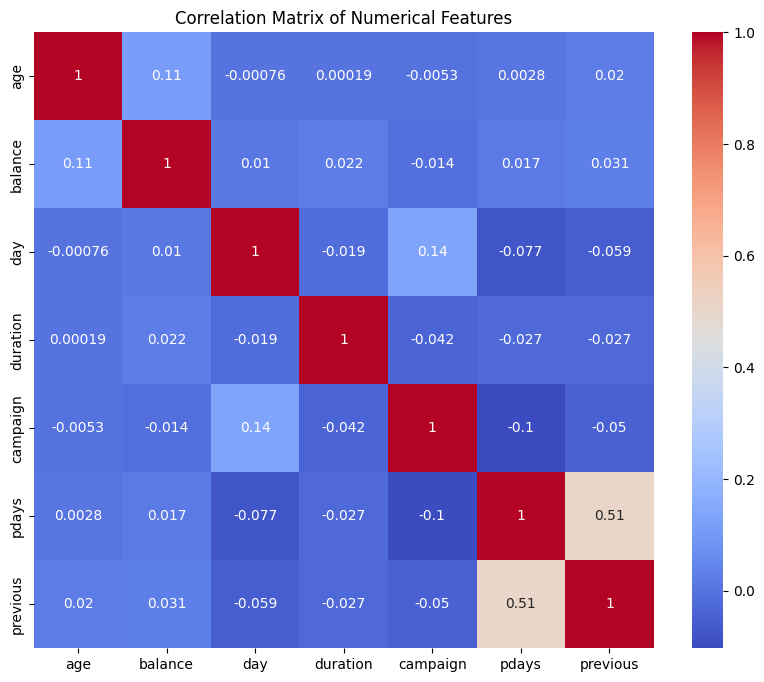

In [ ]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

corr = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Question 1.

a.The usable variables are -Balance,poutcome,duration which will help us to train our model and some demographic indicators are also important like age,maritial and job .Non usable variables are pdays and duration as duraion will cause data leakage and pdays have not much relevance due to -1 .

b.Job and age correlate ,economic indicator ,previos and pdays

c.Data is balanced according to deposit

d. I will use binary class yes and no

Question 2.

F1 score-balances precision and recall making it good for imbalanced dataset by focusing on minor dataset

AUC- Measures the model’s ability to distinguish between classes, providing insight into the model’s performance across different thresholds

Balanced Accuracy: Adjusts for class imbalance by averaging sensitivity true positive rate and true negative rate

Question3.

a.Normalize the dataset as Normalization (scaling to a range) can improve convergence speed and help models handle features with varying ranges.In some cases, transformations (e.g., log) may reduce skewness if certain variables have highly skewed distributions.

b.Combine similar categories for discrete variables where possible,Reducing categories can improve model interpretability and performance by reducing noise from rare categories

c.Variables like duration and pdays will add many noise and we have remove these as this will add high skewness to the results .

Question 4.

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/bank.csv')

X = df.drop('poutcome', axis=1)
y = df['poutcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

test_data = X_test.copy()
test_data['poutcome'] = y_test

print(y_test.value_counts(normalize=True))

poutcome
unknown    0.746082
failure    0.110166
success    0.095835
other      0.047918
Name: proportion, dtype: float64


Question 5.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/bank.csv')

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

labelencoder = LabelEncoder()
df['deposit'] = labelencoder.fit_transform(df['deposit'])


X = df.drop(columns=['deposit'])
y = df['deposit']

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f'Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}')

Training set shape: (8929, 42), Testing set shape: (2233, 42)


In [6]:
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}
svm = SVC(kernel='rbf')


nn_params = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,)],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}
nn = MLPClassifier(max_iter=1000)

rf_params = {
    'max_depth': [None, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestClassifier()

grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='f1')
grid_svm.fit(X_train, y_train)
print(f'Best SVM parameters: {grid_svm.best_params_}')



Best SVM parameters: {'C': 100, 'gamma': 0.01}


In [7]:
grid_nn = GridSearchCV(nn, nn_params, cv=5, scoring='f1')
grid_nn.fit(X_train, y_train)
print(f'Best Neural Network parameters: {grid_nn.best_params_}')


Best Neural Network parameters: {'alpha': 0.1, 'hidden_layer_sizes': (20,)}


In [8]:
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
print(f'Best Random Forest parameters: {grid_rf.best_params_}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best Random Forest parameters: {'max_depth': None, 'max_features': 'sqrt'}


In [10]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    print(classification_report(y_test, y_pred))

# Evaluate SVM
best_svm = grid_svm.best_estimator_
evaluate_model(best_svm, X_test, y_test)

# Evaluate Neural Network
best_nn = grid_nn.best_estimator_
evaluate_model(best_nn, X_test, y_test)

# Evaluate Random Forest
best_rf = grid_rf.best_estimator_
evaluate_model(best_rf, X_test, y_test)

Accuracy: 0.8557993730407524
F1 Score: 0.8526989935956084
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1175
           1       0.83      0.88      0.85      1058

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233

Accuracy: 0.8553515450067174
F1 Score: 0.8513575701794753
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1175
           1       0.83      0.87      0.85      1058

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233

Accuracy: 0.8566950291088222
F1 Score: 0.8540145985401459
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1175
           1       0.83      0.88      0.85      1058

    accu

Question 6.

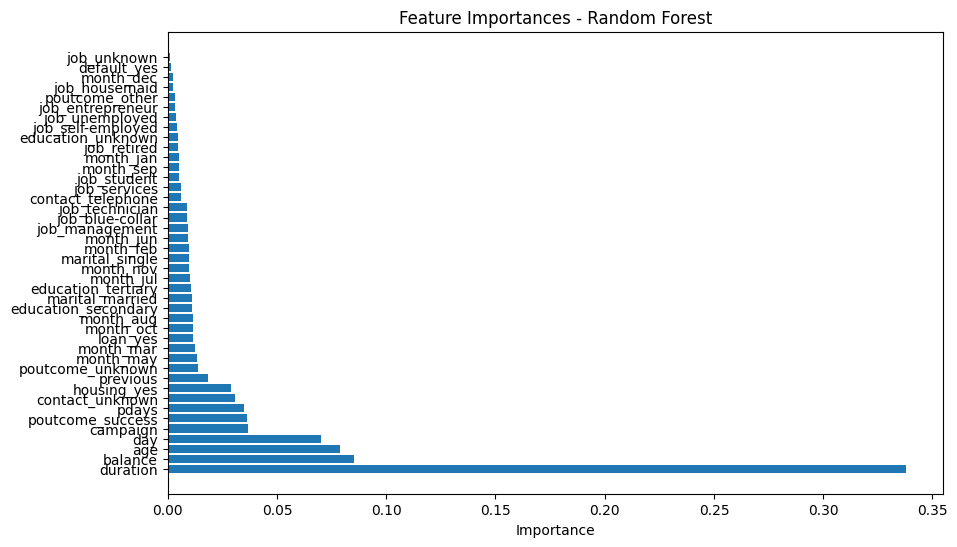

In [11]:
best_rf.fit(X_train, y_train)

importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances - Random Forest')
plt.show()

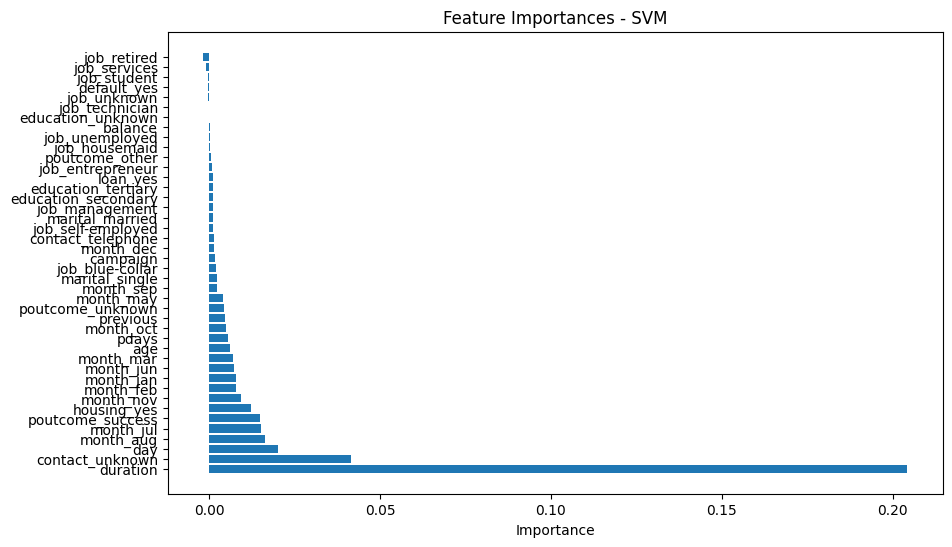

In [12]:
from sklearn.inspection import permutation_importance

best_svm.fit(X_train, y_train)

perm_importance = permutation_importance(best_svm, X_test, y_test, n_repeats=30, random_state=0)

svm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(svm_importance_df['Feature'], svm_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances - SVM')
plt.show()


In [19]:

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # if you need probabilities for ROC-AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.85
F1 Score: 0.84
AUC-ROC: 0.92


Quesion 7 and 8

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/bank.csv')
X = df.drop('deposit', axis=1)
y = df['deposit']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.3, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logreg = LogisticRegression(penalty='l2', solver='liblinear')
rfecv_logreg = RFECV(estimator=logreg, step=1, cv=cv, scoring='f1')
rfecv_logreg.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rfecv_rf = RFECV(estimator=rf, step=1, cv=cv, scoring='f1')
rfecv_rf.fit(X_train, y_train)




RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(random_state=42), scoring='f1')

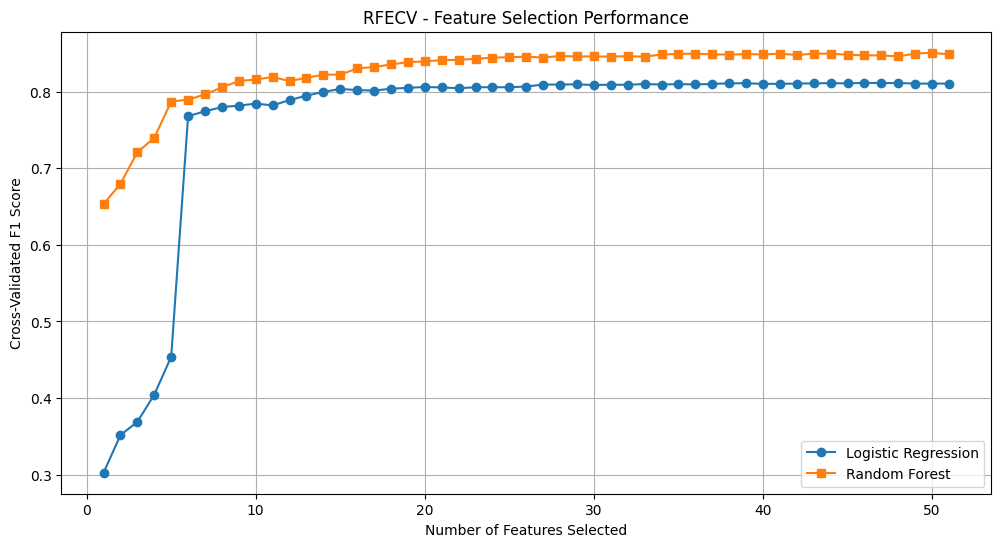

Optimal number of features for Logistic Regression: 46
Optimal number of features for Random Forest: 50


In [13]:

plt.figure(figsize=(12, 6))


plt.plot(range(1, len(rfecv_logreg.cv_results_['mean_test_score']) + 1),
         rfecv_logreg.cv_results_['mean_test_score'],
         label="Logistic Regression", marker='o')

plt.plot(range(1, len(rfecv_rf.cv_results_['mean_test_score']) + 1),
         rfecv_rf.cv_results_['mean_test_score'],
         label="Random Forest", marker='s')

plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated F1 Score")
plt.title("RFECV - Feature Selection Performance")
plt.legend()
plt.grid()
plt.show()


print(f"Optimal number of features for Logistic Regression: {rfecv_logreg.n_features_}")
print(f"Optimal number of features for Random Forest: {rfecv_rf.n_features_}")


Question 9.

In [22]:
df = pd.read_csv('/content/drive/MyDrive/bank.csv')
train_data = df[~df['month'].isin(['jun', 'jul'])]
test_data = df[df['month'].isin(['jun', 'jul'])]

X_train, y_train = train_data.drop(columns=['deposit']), train_data['deposit']
X_test, y_test = test_data.drop(columns=['deposit']), test_data['deposit']

In [23]:
train_data = df[df['job'] != 'technician']
test_data = df[df['job'] == 'technician']


X_train, y_train = train_data.drop(columns=['deposit']), train_data['deposit']
X_test, y_test = test_data.drop(columns=['deposit']), test_data['deposit']

In [24]:
train_data = df[~df['month'].isin(['jun', 'jul'])]
test_data = df[df['month'].isin(['jun', 'jul'])]

In [25]:
train_data = df[df['job'] != 'technician']
test_data = df[df['job'] == 'technician']


In [29]:
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
labelencoder = LabelEncoder()
df_encoded['deposit'] = labelencoder.fit_transform(df_encoded['deposit'])

train_data = df_encoded[~df['month'].isin(['jun', 'jul'])]
test_data = df_encoded[df['month'].isin(['jun', 'jul'])]

X_train = train_data.drop(columns='deposit')
y_train = train_data['deposit']
X_test = test_data.drop(columns='deposit')
y_test = test_data['deposit']

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.8044590643274854
F1 Score: 0.7966552641581148


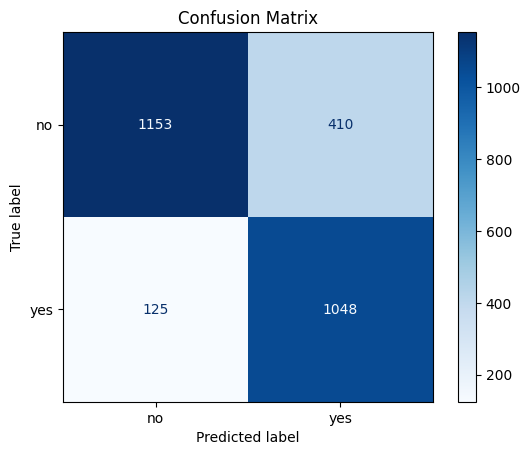

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labelencoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [18]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder


Question 10 and 11

In [16]:

data_dir = '/content/drive/MyDrive/hymenoptera_data/hymenoptera_data'

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

class_names = image_datasets['train'].classes

print("Dataset sizes:", dataset_sizes)
print("Class names:", class_names)


Dataset sizes: {'train': 244, 'val': 153}
Class names: ['ants', 'bees']


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Extracted features shape: torch.Size([16, 512])


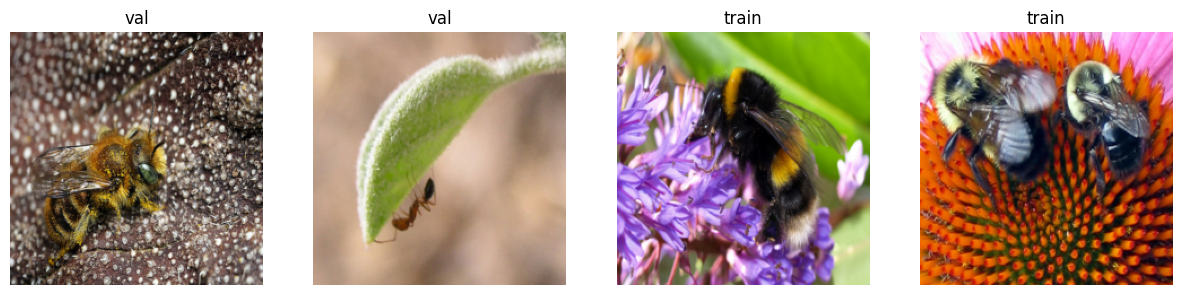

In [23]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


image_datasets = datasets.ImageFolder(root=data_dir, transform=transform)
dataloader = DataLoader(image_datasets, batch_size=4, shuffle=True)

resnet18 = models.resnet18(pretrained=True)

feature_extractor = nn.Sequential(*list(resnet18.children())[:-1])
feature_extractor.eval()

def extract_features(images):
    with torch.no_grad():
        features = feature_extractor(images)
    return features.view(features.size(0), -1)

features_list = []
sample_images = []
sample_labels = []

for i, (inputs, labels) in enumerate(dataloader):
    if i == 4:
        break

    features = extract_features(inputs)
    features_list.append(features)

    sample_images.append(inputs)
    sample_labels.append(labels)

all_features = torch.cat(features_list, dim=0)
print(f"Extracted features shape: {all_features.shape}")


class_names = image_datasets.classes
fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))

for idx, (image_batch, label_batch) in enumerate(zip(sample_images, sample_labels)):
    image = image_batch[0].permute(1, 2, 0).numpy()
    image = np.clip(image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1)
    label = class_names[label_batch[0]]
    axes[idx].imshow(image)
    axes[idx].set_title(label)
    axes[idx].axis('off')

plt.show()

In [24]:
model = models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(class_names))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)


def train_model(model, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-" * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0


            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)


                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    if phase == 'train':
                        loss.backward()
                        optimizer.step()


                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    print("Training complete")


train_model(model, criterion, optimizer, num_epochs=5)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


train Loss: 0.6337 Acc: 0.6844
val Loss: 0.2584 Acc: 0.9085
Epoch 2/5
----------
train Loss: 0.4693 Acc: 0.7623
val Loss: 0.2501 Acc: 0.9150
Epoch 3/5
----------
train Loss: 0.4934 Acc: 0.7951
val Loss: 0.1967 Acc: 0.9412
Epoch 4/5
----------
train Loss: 0.5216 Acc: 0.7746
val Loss: 0.1780 Acc: 0.9346
Epoch 5/5
----------
train Loss: 0.3891 Acc: 0.8320
val Loss: 0.2701 Acc: 0.8889
Training complete


Epoch 1/5
----------
train Loss: 0.6825 Acc: 0.7541
val Loss: 0.1923 Acc: 0.9412
Epoch 2/5
----------
train Loss: 0.4273 Acc: 0.8197
val Loss: 0.2051 Acc: 0.9412
Epoch 3/5
----------
train Loss: 0.5389 Acc: 0.7869
val Loss: 0.2184 Acc: 0.9281
Epoch 4/5
----------
train Loss: 0.3798 Acc: 0.8525
val Loss: 0.2848 Acc: 0.9020
Epoch 5/5
----------
train Loss: 0.3899 Acc: 0.8402
val Loss: 0.2311 Acc: 0.9412
Training complete


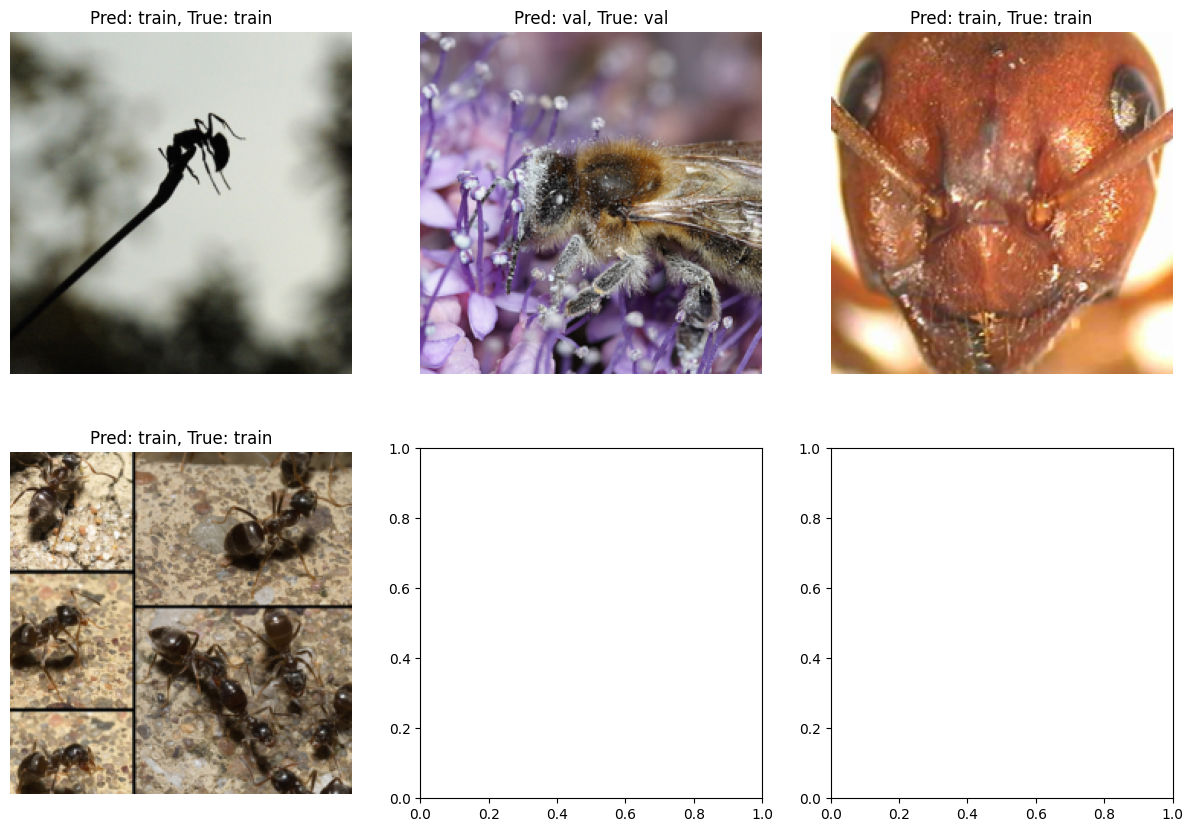

In [26]:
train_model(model, criterion, optimizer, num_epochs=5)

# Function to display some predictions
def display_predictions(dataloader, model, class_names, num_images=6):
    model.eval()  # Set model to evaluation mode
    images, labels = next(iter(dataloader['val']))  # Get a batch of images and labels
    images = images.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    # Move images and labels to CPU for visualization
    images = images.cpu()
    preds = preds.cpu()
    labels = labels.cpu()

    # Set up the plot
    num_images = min(num_images, images.size(0))  # Adjust to the number of images available
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i in range(num_images):
        image = images[i].permute(1, 2, 0).numpy()  # Rearrange dimensions for display
        image = np.clip(image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406], 0, 1)  # De-normalize
        axes[i].imshow(image)
        axes[i].set_title(f"Pred: {class_names[preds[i]]}, True: {class_names[labels[i]]}")
        axes[i].axis('off')

    plt.show()

# Display predictions
display_predictions(dataloaders, model, class_names)

In [44]:
model = models.resnet18(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])
model.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [46]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

def extract_features(dataset, model):
    features = []

    with torch.no_grad():
        for inputs, _ in dataset:
            inputs = inputs.to(device)
            output = model(inputs)
            output = output.view(output.size(0), -1).cpu().numpy()
            features.append(output)

    features = np.concatenate(features, axis=0)
    return features


train_loader = torch.utils.data.DataLoader(image_datasets['train'], batch_size=4, shuffle=False, num_workers=4)
train_features = extract_features(train_loader, model)
print("Train features shape:", train_features.shape)

Train features shape: (244, 512)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split

Question 12.

In [51]:
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Make predictions
y_pred_logreg = best_logreg.predict(X_test)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Calculate F1 score with pos_label set to 1 (or 0 if that's your positive class)
f1_logreg = f1_score(y_test, y_pred_logreg, pos_label=1)  # Set pos_label to 1

# Output results
print("Logistic Regression (L2) Results:")
print("Accuracy:", accuracy_logreg)
print("F1 Score:", f1_logreg)


Logistic Regression (L2) Results:
Accuracy: 0.9912280701754386
F1 Score: 0.993006993006993


In [54]:
print("Unique labels in y_test:", set(y_test))
print("Unique labels in y_pred_logreg:", set(y_pred_logreg))

Unique labels in y_test: {0, 1}
Unique labels in y_pred_logreg: {0, 1}


In [55]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

Question 13.

We implemented transfer learning using the pre-trained ResNet18 model for image classification. We modified the final layer for our dataset, trained the model with CrossEntropyLoss and SGD, and visualized predictions to assess performance. The findings demonstrate the efficiency of transfer learning in improving classification tasks with limited data.